In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("../input/vehicle-images-dataset", output="./new",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values



Copying files: 15645 files [00:55, 282.54 files/s]


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from numpy import expand_dims


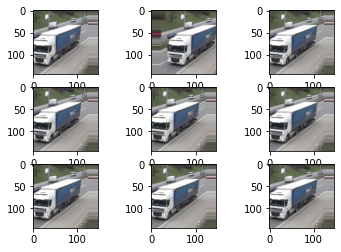

In [32]:
img = load_img('../input/vehicle-images-dataset/Big Truck/Image_000002.jpg')
# example of horizontal shift image augmentation

# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-20,20])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

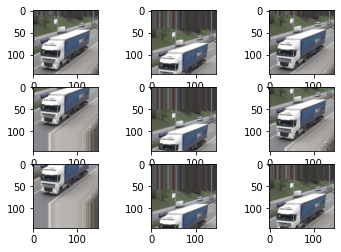

In [33]:
# # example of VERTICAL shift image augmentation
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

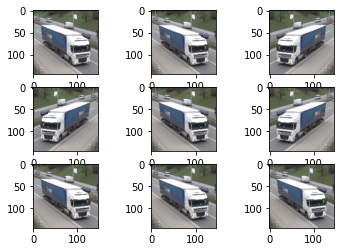

In [34]:
#Horizontal and Vertical Flip Augmentation
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

Width and Height Shift

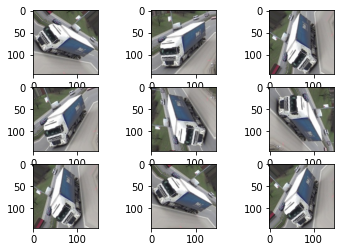

In [35]:
#Random Rotation Augmentation
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

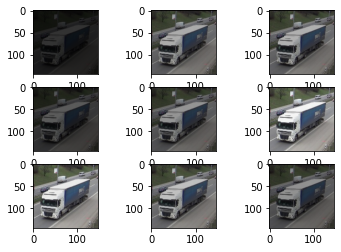

In [36]:
# BRIGHTNESS Augmentation
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

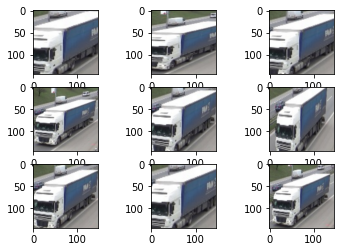

In [37]:
#Random Zoom Augmentation
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [46]:
TRAIN_DIR = './new/train'
VAL_DIR = './new/val'
TEST_DIR = './new/test'

In [47]:
IMG_SIZE=32


In [48]:
traingen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0, zoom_range=[0.5,1.0], brightness_range=[0.2,1.0])
valgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
testgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
# load and iterate training dataset
train_it = traingen.flow_from_directory(TRAIN_DIR, class_mode='categorical', target_size=(IMG_SIZE, IMG_SIZE), batch_size=64)
# load and iterate validation dataset
val_it = valgen.flow_from_directory(VAL_DIR, class_mode='categorical', target_size=(IMG_SIZE, IMG_SIZE),batch_size=64)
# load and iterate test dataset
test_it = testgen.flow_from_directory(TEST_DIR, class_mode='categorical',target_size=(IMG_SIZE, IMG_SIZE), batch_size=64)

Found 12513 images belonging to 7 classes.
Found 1560 images belonging to 7 classes.
Found 1572 images belonging to 7 classes.


In [49]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [50]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [51]:
model = define_model()
history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=val_it, validation_steps=len(val_it), epochs=10, verbose=1)

Epoch 1/10
196/196 [==============================] - 29s 143ms/step - loss: 1.8487 - accuracy: 0.2776 - val_loss: 1.8006 - val_accuracy: 0.2981
Epoch 2/10
196/196 [==============================] - 28s 142ms/step - loss: 1.8188 - accuracy: 0.2947 - val_loss: 1.7969 - val_accuracy: 0.2981
Epoch 3/10
196/196 [==============================] - 27s 138ms/step - loss: 1.8110 - accuracy: 0.2957 - val_loss: 1.7944 - val_accuracy: 0.2981
Epoch 4/10
196/196 [==============================] - 27s 140ms/step - loss: 1.8048 - accuracy: 0.2967 - val_loss: 1.7901 - val_accuracy: 0.2981
Epoch 5/10
196/196 [==============================] - 27s 140ms/step - loss: 1.7970 - accuracy: 0.2972 - val_loss: 1.7830 - val_accuracy: 0.2981
Epoch 6/10
196/196 [==============================] - 28s 142ms/step - loss: 1.7951 - accuracy: 0.2975 - val_loss: 1.7781 - val_accuracy: 0.2981
Epoch 7/10
196/196 [==============================] - 28s 140ms/step - loss: 1.7882 - accuracy: 0.2982 - val_loss: 1.7676 - val_ac